In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [2]:
play_data = pd.read_csv('tennis.csv.txt')

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
# Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

entropy_play = -(9/14)*np.log2(9/14)-(5/14)*np.log2(5/14)
print(entropy_play)

0.9402859586706311


In [6]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [7]:
# Entropy(Play|Outlook=Sunny)
entropy_play_sunny = -(3/5)*np.log2(3/5)-(2/5)*np.log2(2/5)
entropy_play_sunny

0.9709505944546686

In [8]:
# Entropy(Play|Outlook=overcast)
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [9]:
entropy_play_rainy = -(3/5)*np.log2(3/5)-(2/5)*np.log2(2/5)
entropy_play_rainy

0.9709505944546686

In [10]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

gain_outlook = entropy_play - (5/14)*entropy_play_sunny -(5/14)*entropy_play_rainy
gain_outlook

0.24674981977443933

In [11]:
play_data[play_data.temp == 'hot']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
12,overcast,hot,normal,False,yes


In [12]:
entropy_play_temp_hot = -(2/4)*np.log2(2/4)-2/4*np.log2(2/4)

entropy_play_temp_hot

1.0

In [13]:
play_data[play_data.temp == 'cool']

,outlook,temp,humidity,windy,play
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
8,sunny,cool,normal,False,yes


In [14]:
entropy_play_temp_cool =  -(1/4)*np.log2(1/4)-3/4*np.log2(3/4)

entropy_play_temp_cool

0.8112781244591328

In [15]:
play_data[play_data.temp == 'mild']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
7,sunny,mild,high,False,no
9,rainy,mild,normal,False,yes
10,sunny,mild,normal,True,yes
11,overcast,mild,high,True,yes
13,rainy,mild,high,True,no


In [16]:
entropy_play_temp_mild =  -(4/6)*np.log2(4/6)-2/6*np.log2(2/6)

entropy_play_temp_mild

0.9182958340544896

In [17]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

In [18]:
gain_temp = entropy_play-(4/14)*entropy_play_temp_hot-(6/14)*entropy_play_temp_mild-(4/14)*entropy_play_temp_cool
gain_temp

0.02922256565895487

In [19]:
play_data[play_data.humidity == 'high']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
7,sunny,mild,high,False,no
11,overcast,mild,high,True,yes
13,rainy,mild,high,True,no


In [20]:
entropy_play_humid_high = -(4/7)*np.log2(4/7)-(3/7)*np.log2(3/7)
print(entropy_play_humid_high)

0.9852281360342515


In [21]:
play_data[play_data.humidity == 'normal']

,outlook,temp,humidity,windy,play
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes
10,sunny,mild,normal,True,yes
12,overcast,hot,normal,False,yes


In [22]:
entropy_play_humid_normal = -(1/7)*np.log2(1/7)-(6/7)*np.log2(6/7)
print(entropy_play_humid_normal)

0.5916727785823275


In [23]:
Gain_humid = entropy_play - (7/14)*entropy_play_humid_high-(7/14)*entropy_play_humid_normal
Gain_humid

0.15183550136234164

In [24]:
play_data[play_data.windy]

,outlook,temp,humidity,windy,play
1,sunny,hot,high,True,no
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
10,sunny,mild,normal,True,yes
11,overcast,mild,high,True,yes
13,rainy,mild,high,True,no


In [25]:
play_data[~play_data.windy]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes
12,overcast,hot,normal,False,yes


In [26]:
entropy_play_windy_false = -(2/8)*np.log2(2/8)-(6/8)*np.log2(6/8)
entropy_play_windy_false

0.8112781244591328

In [27]:
gain_windy = entropy_play - 8/14*entropy_play_windy_false-6/14*1
gain_windy

0.048127030408269544

In [28]:
max(gain_temp,gain_windy,Gain_humid,gain_outlook)

0.24674981977443933

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [30]:
iris = load_iris()

In [31]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [32]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
dt = DecisionTreeClassifier(criterion='entropy')

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(iris.data,iris.target)

In [44]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

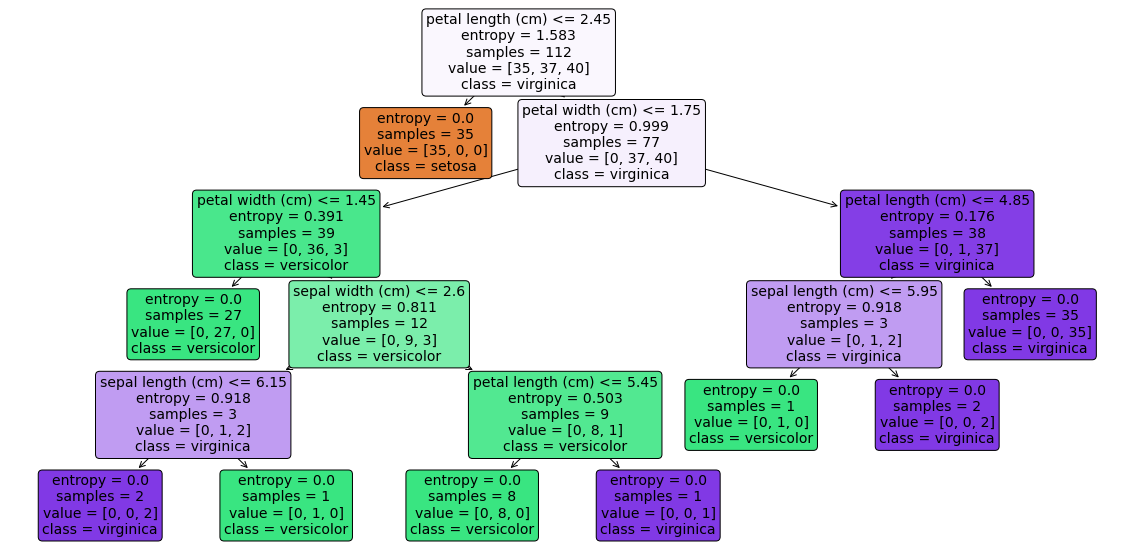

In [40]:
plt.figure(figsize=(20,10))
a = plot_tree(dt, 
              feature_names=iris.feature_names, 
              class_names=iris.target_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [41]:
dt.predict(xtest)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1])

In [ ]:
# Feature Importances
# Important features will be higher up the tree
# We can use this techniques to identify important features

In [42]:
dt.feature_importances_

array([0.03108092, 0.01382692, 0.61375865, 0.34133351])